In [18]:
import requests
import pandas as pd
from datetime import datetime

class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = 'https://www.alphavantage.co/query'
        self.df = pd.DataFrame(columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    def fetch_intraday_data(self, script):
        url = self.base_url + f'?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}'
        response = requests.get(url)
        self.intraday_data = response.json()

    def convert_intraday_data(self, script):
        data = self.intraday_data[f'Time Series (5min)']
        rows = []
        for timestamp, values in data.items():
            dt = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
            row = {'timestamp': dt, 'open': float(values['1. open']), 'high': float(values['2. high']), 'low': float(values['3. low']), 'close': float(values['4. close']), 'volume': int(values['5. volume'])}
            rows.append(row)
        new_df = pd.DataFrame(rows)
        self.df = pd.concat([self.df, new_df], ignore_index=True)

    def __getitem__(self, index):
        return self.df.iloc[index]

    def __setitem__(self, index, value):
        self.df.iloc[index] = value

    def __contains__(self, value):
        return value in self.df.values


s = ScriptData(api_key='8K2E7XR1PGDGRPDS')
s.fetch_intraday_data('AAPL')
s.convert_intraday_data('AAPL')
df = s.df
print(df.head(10))
print(df.tail(10))


            timestamp      open    high       low     close volume
0 2023-02-13 20:00:00  153.6600  153.70  153.6000  153.7000   7841
1 2023-02-13 19:55:00  153.6400  153.67  153.6400  153.6600   4691
2 2023-02-13 19:50:00  153.6500  153.65  153.6100  153.6300   3566
3 2023-02-13 19:45:00  153.6500  153.67  153.6500  153.6700   2083
4 2023-02-13 19:40:00  153.6500  153.66  153.6500  153.6600   6946
5 2023-02-13 19:35:00  153.6600  153.66  153.6500  153.6500   6985
6 2023-02-13 19:30:00  153.6301  153.65  153.6301  153.6500   2747
7 2023-02-13 19:25:00  153.6201  153.64  153.6201  153.6400   1260
8 2023-02-13 19:20:00  153.6500  153.65  153.6101  153.6101   4269
9 2023-02-13 19:15:00  153.6600  153.67  153.6600  153.6700   1127
             timestamp      open      high       low     close  volume
90 2023-02-13 12:30:00  154.1580  154.2600  153.9401  154.0699  835562
91 2023-02-13 12:25:00  153.9600  154.1700  153.8600  154.1545  958649
92 2023-02-13 12:20:00  153.8267  154.0000  153.82

In [4]:
import requests
import pandas as pd
from datetime import datetime

class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = 'https://www.alphavantage.co/query'
        self.df = pd.DataFrame(columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    def fetch_intraday_data(self, script):
        url = self.base_url + f'?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}'
        response = requests.get(url)
        self.intraday_data = response.json()

    def convert_intraday_data(self, script):
        data = self.intraday_data[f'Time Series (5min)']
        rows = []
        for timestamp, values in data.items():
            dt = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
            row = {'timestamp': dt, 'open': float(values['1. open']), 'high': float(values['2. high']), 'low': float(values['3. low']), 'close': float(values['4. close']), 'volume': int(values['5. volume'])}
            rows.append(row)
        new_df = pd.DataFrame(rows)
        self.df = pd.concat([self.df, new_df], ignore_index=True)
        
    def indicator1(self, timeperiod):
        ma = self.df['close'].rolling(window=timeperiod).mean()
        return pd.DataFrame({'timestamp': self.df['timestamp'], 'indicator': ma})

    def __getitem__(self, index):
        return self.df.iloc[index]

    def __setitem__(self, index, value):
        self.df.iloc[index] = value

    def __contains__(self, value):
        return value in self.df.values


# Create a ScriptData instance with your API key
s = ScriptData(api_key='8K2E7XR1PGDGRPDS')

# Fetch and convert intraday data for the AAPL stock
s.fetch_intraday_data('AAPL')
s.convert_intraday_data('AAPL')
df = s.df

# Calculate a 5-period moving average of the 'close' column
ma_df = s.indicator1(timeperiod=5)

# Print the first and last 10 rows of the moving average DataFrame
print(ma_df.head(10))
print(ma_df.tail(10))



            timestamp  indicator
0 2023-02-13 20:00:00        NaN
1 2023-02-13 19:55:00        NaN
2 2023-02-13 19:50:00        NaN
3 2023-02-13 19:45:00        NaN
4 2023-02-13 19:40:00  153.66400
5 2023-02-13 19:35:00  153.65400
6 2023-02-13 19:30:00  153.65200
7 2023-02-13 19:25:00  153.65400
8 2023-02-13 19:20:00  153.64202
9 2023-02-13 19:15:00  153.64402
             timestamp  indicator
90 2023-02-13 12:30:00  154.06364
91 2023-02-13 12:25:00  154.08854
92 2023-02-13 12:20:00  154.04754
93 2023-02-13 12:15:00  154.00154
94 2023-02-13 12:10:00  153.93486
95 2023-02-13 12:05:00  153.83488
96 2023-02-13 12:00:00  153.68798
97 2023-02-13 11:55:00  153.60598
98 2023-02-13 11:50:00  153.56898
99 2023-02-13 11:45:00  153.53900


             timestamp signal
26 2023-02-13 17:45:00    BUY
27 2023-02-13 17:40:00   SELL
29 2023-02-13 17:30:00    BUY
31 2023-02-13 17:20:00   SELL
33 2023-02-13 17:10:00    BUY
37 2023-02-13 16:50:00   SELL
38 2023-02-13 16:45:00    BUY
39 2023-02-13 16:40:00   SELL
40 2023-02-13 16:35:00    BUY
41 2023-02-13 16:30:00   SELL
43 2023-02-13 16:20:00    BUY
44 2023-02-13 16:15:00   SELL
46 2023-02-13 16:05:00    BUY
47 2023-02-13 16:00:00   SELL
48 2023-02-13 15:55:00    BUY
49 2023-02-13 15:50:00   SELL
53 2023-02-13 15:30:00    BUY
64 2023-02-13 14:35:00   SELL
78 2023-02-13 13:25:00    BUY
83 2023-02-13 13:00:00   SELL
91 2023-02-13 12:20:00    BUY


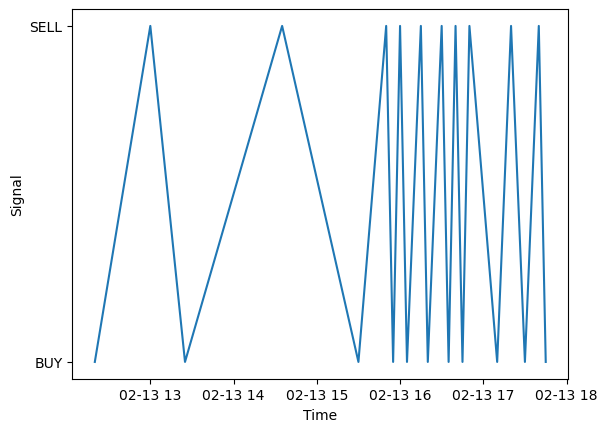

In [23]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt



class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = 'https://www.alphavantage.co/query'
        self.df = pd.DataFrame(columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    def fetch_intraday_data(self, script):
        url = self.base_url + f'?function=TIME_SERIES_INTRADAY&symbol={script}&interval=5min&apikey={self.api_key}'
        response = requests.get(url)
        self.intraday_data = response.json()

    def convert_intraday_data(self, script):
        data = self.intraday_data[f'Time Series (5min)']
        rows = []
        for timestamp, values in data.items():
            dt = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
            row = {'timestamp': dt, 'open': float(values['1. open']), 'high': float(values['2. high']), 'low': float(values['3. low']), 'close': float(values['4. close']), 'volume': int(values['5. volume'])}
            rows.append(row)
        new_df = pd.DataFrame(rows)
        self.df = pd.concat([self.df, new_df], ignore_index=True)

    def __getitem__(self, index):
        return self.df.iloc[index]

    def __setitem__(self, index, value):
        self.df.iloc[index] = value

    def __contains__(self, value):
        return value in self.df.values


class Strategy:
    def __init__(self, api_key, timeperiod):
        self.api_key = api_key
        self.timeperiod = timeperiod

    def compute_signals(self, script):
        # Create a ScriptData instance with your API key
        s = ScriptData(api_key=self.api_key)

        # Fetch and convert intraday data for the given stock
        s.fetch_intraday_data(script)
        s.convert_intraday_data(script)

        # Calculate a moving average of the 'close' column
        ma_df = self.indicator1(s.df, timeperiod=self.timeperiod)

        # Compute the signal values based on the moving average and close data
        signals_df = pd.DataFrame(columns=['timestamp', 'signal'])
        for i in range(1, len(ma_df)):
            if ma_df.iloc[i]['indicator'] > s.df.iloc[i]['close'] and ma_df.iloc[i-1]['indicator'] <= s.df.iloc[i-1]['close']:
                signals_df = pd.concat([signals_df, pd.DataFrame({'timestamp': [s.df.iloc[i]['timestamp']], 'signal': ['BUY']})], ignore_index=True)
            elif ma_df.iloc[i]['indicator'] < s.df.iloc[i]['close'] and ma_df.iloc[i-1]['indicator'] >= s.df.iloc[i-1]['close']:
                signals_df = pd.concat([signals_df, pd.DataFrame({'timestamp': [s.df.iloc[i]['timestamp']], 'signal': ['SELL']})], ignore_index=True)
            else:
                signals_df = pd.concat([signals_df, pd.DataFrame({'timestamp': [s.df.iloc[i]['timestamp']], 'signal': ['NO_SIGNAL']})], ignore_index=True)
        return signals_df

    def indicator1(self, df, timeperiod):
        ma_df = pd.DataFrame(columns=['timestamp', 'indicator'])
        ma_df['timestamp'] = df['timestamp']
        ma_df['indicator'] = df['close'].rolling(timeperiod).mean()
        return ma_df
    
    # Create a Strategy instance with your API key and time period
strategy = Strategy(api_key='8K2E7XR1PGDGRPDS', timeperiod=10)

# Compute the signals for a given stock
signals = strategy.compute_signals('AAPL')

# Filter the signals DataFrame to only show rows where signal is 'BUY' or 'SELL'
filtered_signals = signals.loc[signals['signal'].isin(['BUY', 'SELL'])]

# Print the filtered signals DataFrame
print(filtered_signals)
# Filter signals dataframe to only include rows with BUY or SELL signals
buy_sell_signals = filtered_signals.loc[filtered_signals['signal'].isin(['BUY', 'SELL'])]

# Create line plot of signals over time
plt.plot(buy_sell_signals['timestamp'], buy_sell_signals['signal'])

# Label the x-axis and y-axis
plt.xlabel('Time')
plt.ylabel('Signal')

# Display the plot
plt.show()

